# Scenario

Bellabeat, is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, by they have the potential to become a larger player in the global smart device market.
Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analysing smart device fitness data could help unlock new growth opporunities for the company.

## Bellabeat Stakeholers:
- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer 
- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team 
- Bellabeat Marketing and Analytics Team. 

## Bellabeat Product Offerings
- **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products. 
- **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress. 
- **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness. 
- **Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
- **Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals. 



# ASK

## 1.1 The Busines Task
To analyse competitor smart devices to gain insight into consumer usage - as well as potential trends in global smart device market – to help identify how the insights and trends can be utilised to improve Bellabeat product marketing towards the target audience; thus, providing opportunities for growth.

# PREPARE
Sršen encourages the use of public data that explores smart device users’ daily habits. Specifically, FitBit Fitness Tracker Data (CC0L Public Domain, dataset made available through Mobius): 

    *"This Kaggle data set contains personal fitness tracker for thirty FitBit users. Thirty eligible FitBit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about your daily activity, steps, and heart rate that can be used to explore users’ habits."*

## 1.1 Dataset Credibility
The **ROCCC** framework will be applied to determine the credibility of the data: 

   **Reliability:**
    The FitBit tracker dataset being used is generated from a distributed survey via Amazon Mechanical Turk (AMT); with thirty eligible FitBit users consenting to the sharing of their data. The markers used in the survey should be enough to help derive insights into use of competitor smart devices. Moreover, through additional research, the collection of data through AMT is trusted. This aids in the collection of potential unbiased data. 
    
   **Originality:**
    The data was supplied through the consent from users, in response to a distributed survey; specifically, for FitBit users. The dataset generated does not come directly from a FitBit database. Primary data collected through/from FitBit directly, may be more ideal. Validating the scope of the survey conducted could help better outline the originality of the data collected. 
    
   **Comprehensiveness:**
    Limitations of the dataset can be observed in when considering the comprehensiveness. A greater number of data points could be collected to help provide a deeper analysis of the consumer smart device usage. For example, sex and age. 
    Additionally, a larger sample population with the dataset would be better representative of consumer usage. With a larger sample population, the margin of error is lowered resulting in lower deviance in projected vs actual insights. (The data is more predictable and so better applied to Bellabeat).  Nevertheless, the dataset falls in line with the central limit theorem and findings can be valid. 
    
   **Current:**
    The data was collected between 03.12.2016-05.12.2016. A two-month period. Being from 2016, the data is not current, given the advanced often made within technology market. Moreover, the time period will not be representative of recent changes in consumer behaviours, such as the pressures and changes caused by the COVID-19 pandemic. 
    The date range highlights another limitation to the data. A wider timeframe provides a better understanding of consumer usage overtime. Important when considering the business task. 
    
   **Cited:**
    As the data comes from Amazon Mechanical Turk, it can be cited. 
    
    
## 1.2 Acknowledgements
Bellabeat products Leaf and Time both track the activity, sleep and stress for the consumer. These will be markers applied to the FitBit dataset. dailyActivity_merged and sleepDay_merged will both be used to help compare these markers. With the given dataset, stress is something harder to account for. Furthermore, understanding Bellabeat’ operate in the fitness smart device market, weightinfo_merged data will also be used, as it would be assumed that the consumers would use this as one measure of their tracking. These will be the main dataset used from the Fitness Tracker data. 

# PROCESS
In this section the datasets will be cleaned and transformed so that it is ready for the analysis. For the processing, the R programming language will be used for cleaning; as well as the analysis. *(Documentation will be taken to show the changes that are made to the dataset during the clenaing phase).*

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(skimr)
library(janitor)
library(lubridate)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] "fitbit"

In [2]:
# finding what files are kept to use for the analysis. 
getwd()
list.files(path="../input/fitbit/Fitabase Data 4.12.16-5.12.16")

[1] "/kaggle/working"

[1] "dailyActivity_merged.csv"           "dailyCalories_merged.csv"          
 [3] "dailyIntensities_merged.csv"        "dailySteps_merged.csv"             
 [5] "heartrate_seconds_merged.csv"       "hourlyCalories_merged.csv"         
 [7] "hourlyIntensities_merged.csv"       "hourlySteps_merged.csv"            
 [9] "minuteCaloriesNarrow_merged.csv"    "minuteCaloriesWide_merged.csv"     
[11] "minuteIntensitiesNarrow_merged.csv" "minuteIntensitiesWide_merged.csv"  
[13] "minuteMETsNarrow_merged.csv"        "minuteSleep_merged.csv"            
[15] "minuteStepsNarrow_merged.csv"       "minuteStepsWide_merged.csv"        
[17] "sleepDay_merged.csv"                "weightLogInfo_merged.csv"

In [3]:
x <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
# head(x)
# tibble(x)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Establishing the oultine for what is contained in the datasets. 

dailyActivity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
weightLogInfo <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
sleepDay <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

colnames(dailyActivity)
colnames(weightLogInfo)
colnames(sleepDay)

head(dailyActivity)
head(weightLogInfo)
head(sleepDay)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification fo

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [5]:
dailyintensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailyStep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourlyIntensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
dailyCalories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
hourlyCalories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

colnames(dailyintensities)
colnames(dailyStep)
colnames(hourlyIntensities)
colnames(dailyCalories)
colnames(hourlyCalories)

# head(dailyintensities)

# The additoinal datasets were viewed to establish what their content was/is. The content has been consolidated into dailyActivity, sleepDay, weightLogInfo. 

Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types 

[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

[1] "Id"          "ActivityDay" "StepTotal"

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

[1] "Id"          "ActivityDay" "Calories"

[1] "Id"           "ActivityHour" "Calories"

Having looked through all the datasets, most of the information is contained in three main datasets: dailyActivity, weightLogInfo, sleepDay

In [6]:
# n_distinct will be used to check the number of unique data points in each column.
# nrow will be used to check the number of observations 

# nrow(unique()) should be used to find the unique observations. 

n_distinct(dailyActivity$Id)
nrow(dailyActivity)
print('------')
n_distinct(sleepDay$Id)
nrow(sleepDay)
print('------')
n_distinct(weightLogInfo$Id)
nrow(weightLogInfo)

[1] 33

[1] 940

[1] "------"


[1] 24

[1] 413

[1] "------"


[1] 8

[1] 67

Through the observations, there is a variance between the amount of data that has been collected between the datasets. This will make it harder to cross-analyse the data; deriving insights to then aid the marketing team and their decisions.
Considering the ROCCC framework, the collection of this data has become less reliable and comprehensive. 

dailyAcitvity and sleepDay can both be analysed, where there is matching data; as they are the largest datasets. *(Merging the data – using the outer join concept – can be applied for these two, if necessary.)*

The weightLogInfo only has 8 key data points, from the maximum number of participants. This is well below the minumum sample size according to Central limit therom. Therefore, the insights would not be representitive of the population. It could be concluded that this is not an appropriate dataset to use.

In [7]:
# dailyActivity Date range
min(dailyActivity$ActivityDate)
max(dailyActivity$ActivityDate)
print('------')
# sleepDay date range
min(sleepDay$SleepDay)
max(sleepDay$SleepDay)
print('------')
# weightLogInfo date range 
min(weightLogInfo$Date)
max(weightLogInfo$Date)

[1] "4/12/2016"

[1] "5/9/2016"

[1] "------"


[1] "4/12/2016 12:00:00 AM"

[1] "5/9/2016 12:00:00 AM"

[1] "------"


[1] "4/12/2016 11:59:59 PM"

[1] "5/9/2016 6:39:44 AM"

In [8]:
# All three datasets cover the same date range. However the date range is shorter than
# the two months that were oulitned in the metadata. Data points recorded are shorter
# than one month. 

min_date <- as.Date("2016-04-12")
max_date <- as.Date("2016-05-09")
difftime(min_date,max_date)

Time difference of -27 days

The metadata outlines a two-month period for the data collection. Each of the three datasets, all cover the same date range - 12th April 2016 to 9th May 2016. Although the data was collected over a two-month period, it has been found out that the data collected was over a much shorter period. 27days to be exact. 

Ideally the longer the period, the better reliablity and insights derived. Again, questions about the credability and comprehensiveness of the datasets.

In [9]:
# Separating the date and time:
sleepDay_new <- sleepDay %>% 
  separate(SleepDay, c("Date", "Time"), " ")
head(sleepDay_new)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


Id,Date,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,12:00:00,1,327,346
1503960366,4/13/2016,12:00:00,2,384,407
1503960366,4/15/2016,12:00:00,1,412,442
1503960366,4/16/2016,12:00:00,2,340,367
1503960366,4/17/2016,12:00:00,1,700,712
1503960366,4/19/2016,12:00:00,1,304,320


With the insights, the best two datasets to continue will be the dailyActivity and sleepDay. 

The SleepDay column in the sleepDay dataset has both day and time. This will be split into separate columns. 


In [10]:
# Finding out the number of unrecorded steps. 
unrecorded_steps <- dailyActivity %>%
    filter(TotalSteps == 0)
# n_distinct(unrecorded_steps)
nrow(unrecorded_steps)
print("------")

# There are 77 rows where 0 steps have been recorded. Therefore a new data, set will be
# created. 
dailyActivity_new <- dailyActivity %>%
    filter(TotalSteps !=0)
#n_distinct(dailyActivity_new$Id)
nrow(dailyActivity_new)
# head(dailyActivity_new)

[1] 77

[1] "------"


[1] 863

One of the measures recorded in the dailyActivity data set is the TotalSteps recorded. As this is one of the key pieces of data, where there have been no steps recorded, they should be removed, so that they do not skew the data. (It can be assumed that the individuals who recorded 0 steps did not track their data for that day).

There are 77 rows recorded with 0 Total steps. The new daily activity dataset – dailyActivity_new – now has (nrow) 863 rows. 

# ANALYSE


In [11]:
colnames(dailyActivity_new)
print('-----')
colnames(sleepDay_new)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "-----"


[1] "Id"                 "Date"               "Time"              
[4] "TotalSleepRecords"  "TotalMinutesAsleep" "TotalTimeInBed"

In [12]:
sleepDay_new %>%
    select(TotalSleepRecords, TotalMinutesAsleep,TotalTimeInBed)%>%
    summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [13]:
dailyActivity_new %>%
    select(TotalSteps,TotalDistance,SedentaryMinutes,Calories)%>%
    summary()

   TotalSteps    TotalDistance   SedentaryMinutes    Calories   
 Min.   :    4   Min.   : 0.00   Min.   :   0.0   Min.   :  52  
 1st Qu.: 4923   1st Qu.: 3.37   1st Qu.: 721.5   1st Qu.:1856  
 Median : 8053   Median : 5.59   Median :1021.0   Median :2220  
 Mean   : 8319   Mean   : 5.98   Mean   : 955.8   Mean   :2361  
 3rd Qu.:11092   3rd Qu.: 7.90   3rd Qu.:1189.0   3rd Qu.:2832  
 Max.   :36019   Max.   :28.03   Max.   :1440.0   Max.   :4900  

## Summary Statistics
The summary statistics generated provide the range of data points that are being looked into. For example, TotalSleepRecords has a very small range of data. A very large proportion of data is centred around the mean, with minimum, 1st quartile, median, and 3rd quartile are all found at one. Due to this range of the data, it could make it harder to generate meaningful when comparing data with other variables. 

The summary statistics for the dailyActivity_new show a much wider range of data – of which can provide useful insights. For example, the TotalSteps summary stats, fifty-percent of the data points fall either side of the median at 8053steps. (The mean slightly higher at 8319steps). It is often recommended that 10,000steps should be taken per day for better health. Though in a study by Dr. I-Min lee at Brigham and Women’s hospital and Harvard Medical School analysed the daily activity of 17,000 women – with an average age of 72.([info-source](https://www.nih.gov/news-events/nih-research-matters/how-many-steps-better-health)). They found that death rates declined with more steps taken each day, until about 7,500steps when the benefits begin to level off. 

`geom_smooth()` using formula 'y ~ x'



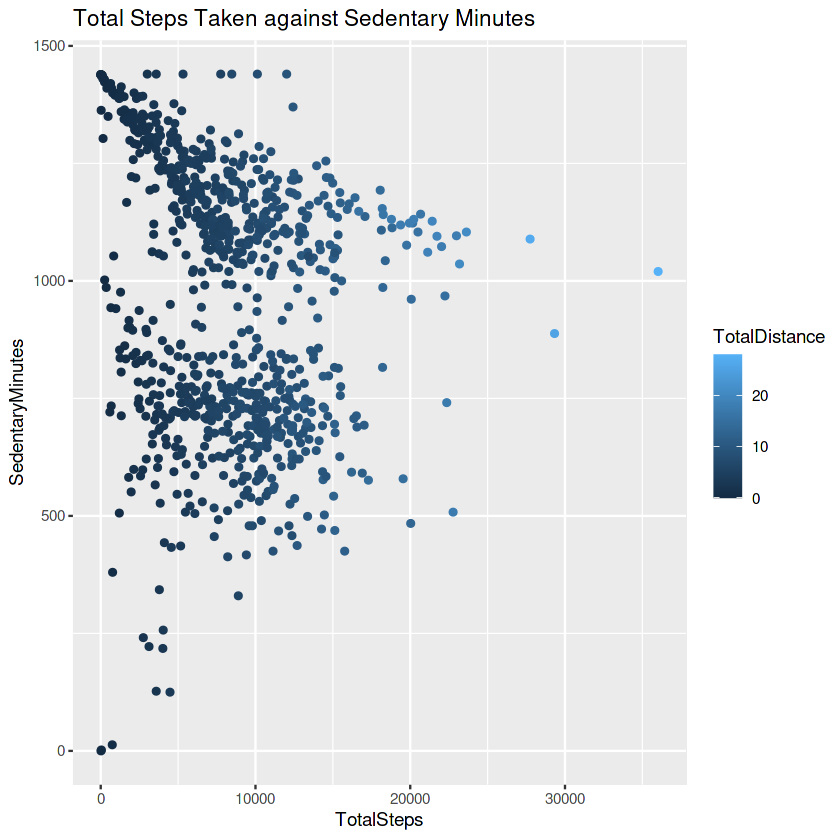

Correlation TotStep and SedMins,Correlation TotStep and TotDist.
<dbl>,<dbl>
-0.1890291,0.9826911


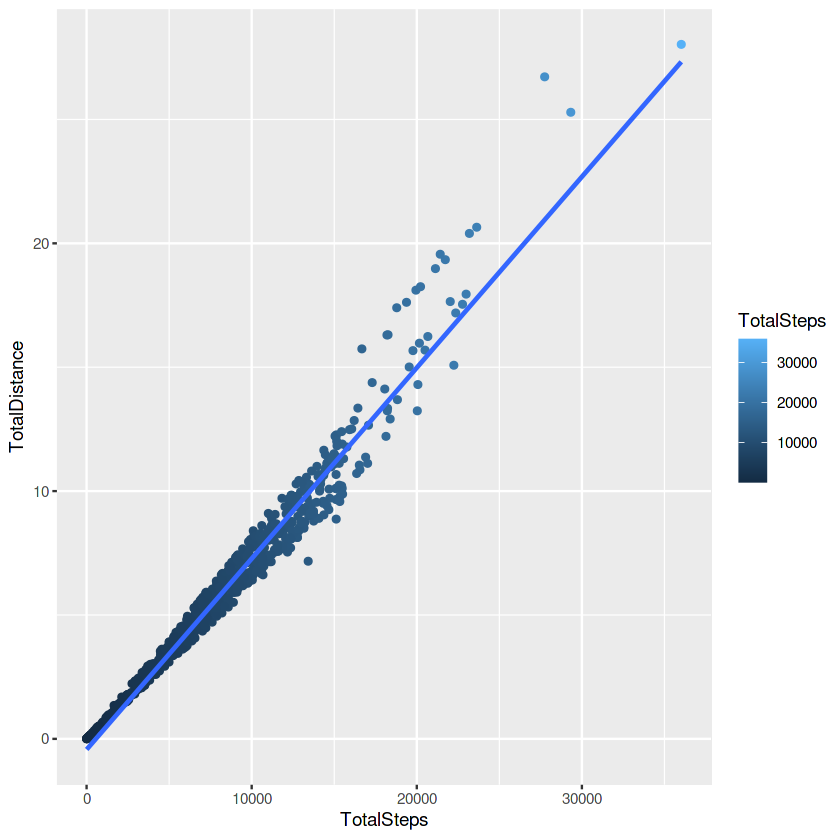

In [14]:
ggplot(data=dailyActivity_new,aes(x=TotalSteps,y=SedentaryMinutes,color = TotalDistance))+geom_point()+labs(title="Total Steps Taken against Sedentary Minutes")
ggplot(data=dailyActivity_new, aes(x=TotalSteps,y=TotalDistance,color=TotalSteps ))+geom_point()+geom_smooth(method="lm",se=FALSE)

dailyActivity_new %>%
    summarize('Correlation TotStep and SedMins'= cor(TotalSteps,SedentaryMinutes),'Correlation TotStep and TotDist.' = cor(TotalSteps,TotalDistance))

### TotalSteps and SedentaryMinutes
There is a large concentration of datapoints between the first and third quartiles. Between this range, the graph shows that an increase in the steps taken contributes to lower sedentary minutes. Although, overall, the graph shows this trend to be a fairly weak correlation at **-0.189**. 

The TotalSteps and TotalDistance shows a strong positive correlation (**0.983**), it highlights the effect of intensity/activity, resulting in the weak correlation of the TotalSteps and SedentaryMinutes.

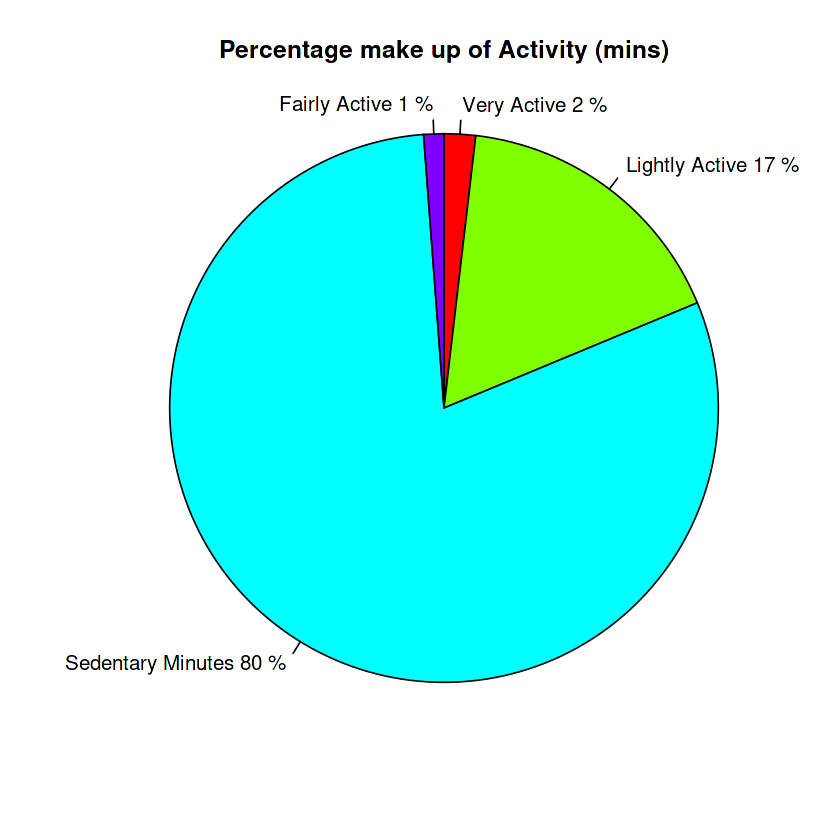

In [15]:
# Representing the intensities in a pie chart. 

# dailyActivity_new %>%
#     select(VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes) %>% 
#     summary()

z <- c(23.02,210,995.8,14.78) # using the means
x <- c("Very Active","Lightly Active", "Sedentary Minutes","Fairly Active") # Heading
percent <- round(z/sum(z)*100) # finding the percentage proportions
# print(percent)
xpercent <- paste(x, percent) # reassigning to meet pie() criteria
xpercent2 <- paste(xpercent,"%",sep=" ") # one way to add formatting to the visual

pie(z,labels = xpercent2,radius = 2, main="Percentage make up of Activity (mins)",col=rainbow(length(z)),clockwise=TRUE)
# legend("bottomright",x,cex=1.5,fill=rainbow(length(z)))


This pie chart highlights that, on average, the population spend 80%of their time sedentary. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



Correlation TotStep and Calories
<dbl>
0.5619815


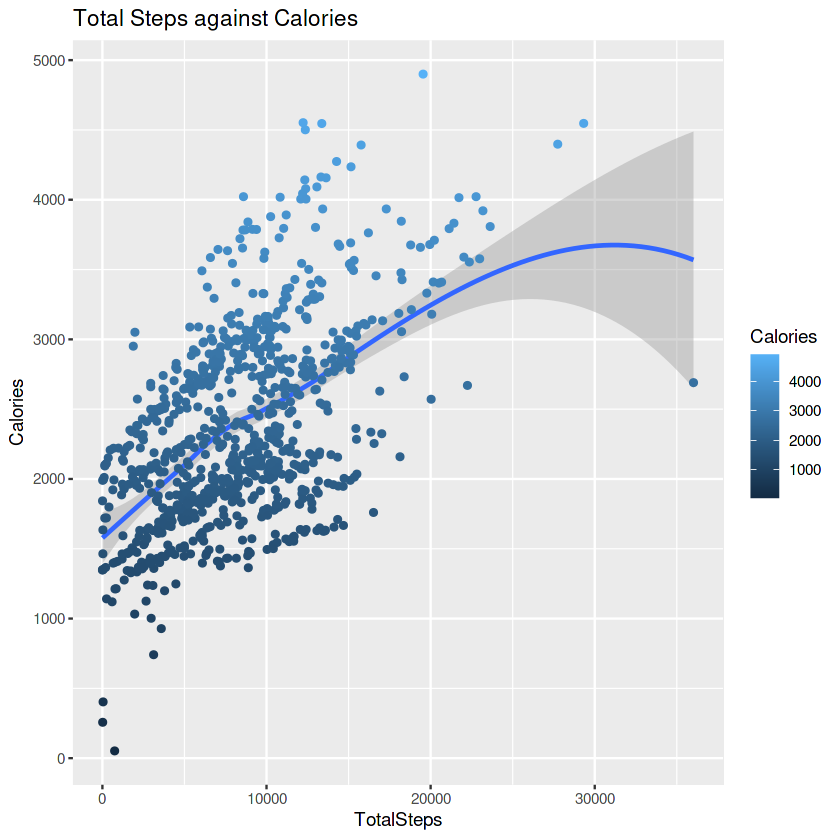

In [16]:
ggplot(data=dailyActivity_new,aes(x=TotalSteps, y=Calories, color=Calories))+geom_smooth()+geom_point()+labs(title="Total Steps against Calories")

dailyActivity_new %>%
    summarise('Correlation TotStep and Calories'= cor(TotalSteps,Calories))

### TotalSteps against Calories 
This shows the relationship, where increased activity – steps – shows higher amounts of calories recorded. Although the relationship is positive, again, it is clear to see that the data is not entirely linear.
Using the pie chart, considerations for the time spent in intensity can be made, as one reason/variable for higher rates of calories recorded when fewer steps are taken. 

Correlation TotMins. and TotTimeinBed
<dbl>
0.9304575


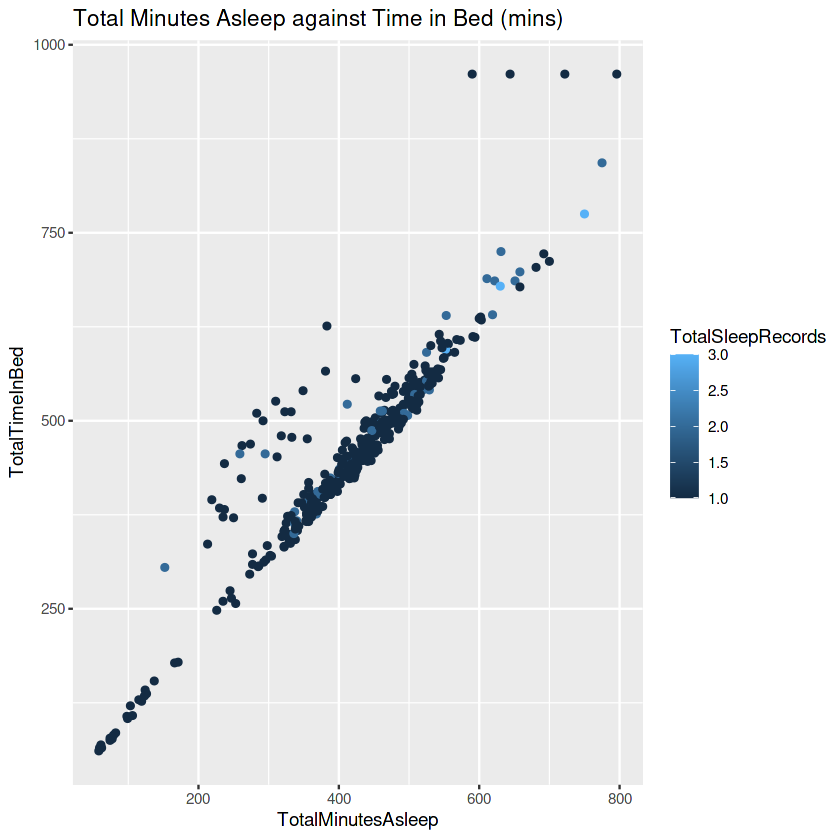

In [17]:
ggplot(data=sleepDay_new,aes(x=TotalMinutesAsleep,y=TotalTimeInBed, color = TotalSleepRecords))+geom_point()+labs(title ="Total Minutes Asleep against Time in Bed (mins)")

sleepDay_new %>%
    summarize('Correlation TotMins. and TotTimeinBed'= cor(TotalMinutesAsleep,TotalTimeInBed))

### TotalMinutesAsleep and TotalTimeInBed
This graph shows a strong positive correlation (**0.93**), with the longer time spent alseep the longer the period in bed. 

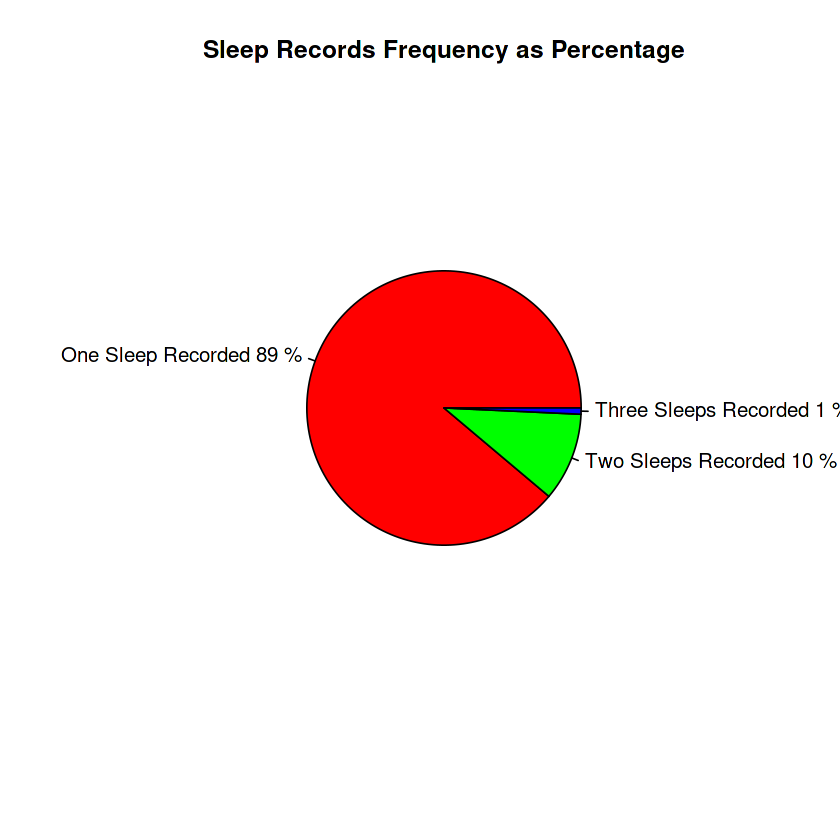

In [18]:
# ggplot(data=sleepDay_new,aes(x=TotalSleepRecords))+geom_bar(fill = "#00abff")+labs(title="Total Sleep Days Recorded Frequency")

# sleepDay_new %>%
#     group_by(Id) %>%
#     count(TotalSleepRecords, sort=TRUE)

## Fining the values to create the pie chart
# sleepDay_new %>% 
#     count(TotalSleepRecords,sort=TRUE)

value <- c(367,43,3)
labels <- c('One Sleep Recorded','Two Sleeps Recorded','Three Sleeps Recorded')
pct <- round(value/sum(value)*100)
# print(pct)
pcttmp <- paste(labels,pct)
pct2 <- paste(pcttmp,"%",sep=" ")

pie(value,labels = pct2, radius = 1,main="Sleep Records Frequency as Percentage",col=rainbow(length(value)))
# legend("bottomright",labels,fill=rainbow(length(value)))

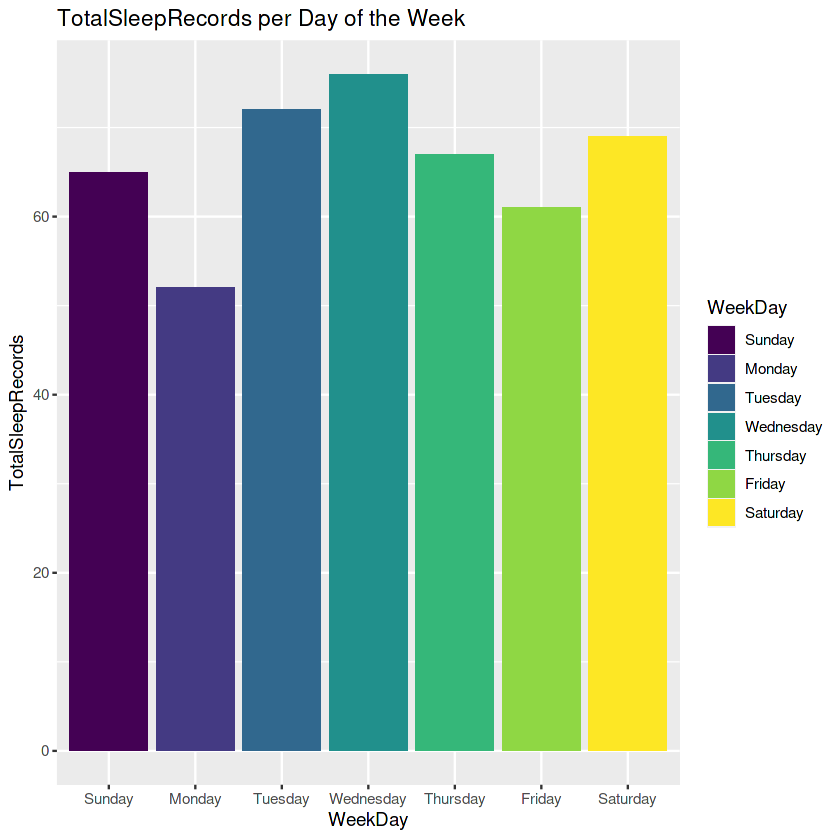

In [19]:
# head(sleepDay_new)

# Creating the days of the week sleep is recorded. 
sdn_weekday <- sleepDay_new %>%
    mutate(WeekDay = wday(mdy(Date),label=TRUE,abbr=FALSE))

# head(sdn_weekday) # to check the mutation of the new table

ggplot(data=sdn_weekday,aes(x=WeekDay,y=TotalSleepRecords,fill=WeekDay))+geom_col()+labs(title="TotalSleepRecords per Day of the Week")

In [20]:
# combining data 
combined_data <- merge(dailyActivity_new,unique(sdn_weekday),by="Id")
# colnames(combined_data)
# head(combined_data)
n_distinct(combined_data$Id)
nrow(combined_data)

[1] 24

[1] 11737

In [21]:
# there are missing datapoints with the merge. To keep the 33 data points, combinging the data
# with an outer join can be used to pick them up. 
combined_df <- merge(dailyActivity_new,unique(sdn_weekday),by="Id",all=TRUE)
n_distinct(combined_df$Id)

# head(combined_df) # Check to view the table 
colnames(combined_df)

[1] 33

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "Date"                    
[17] "Time"                     "TotalSleepRecords"       
[19] "TotalMinutesAsleep"       "TotalTimeInBed"          
[21] "WeekDay"

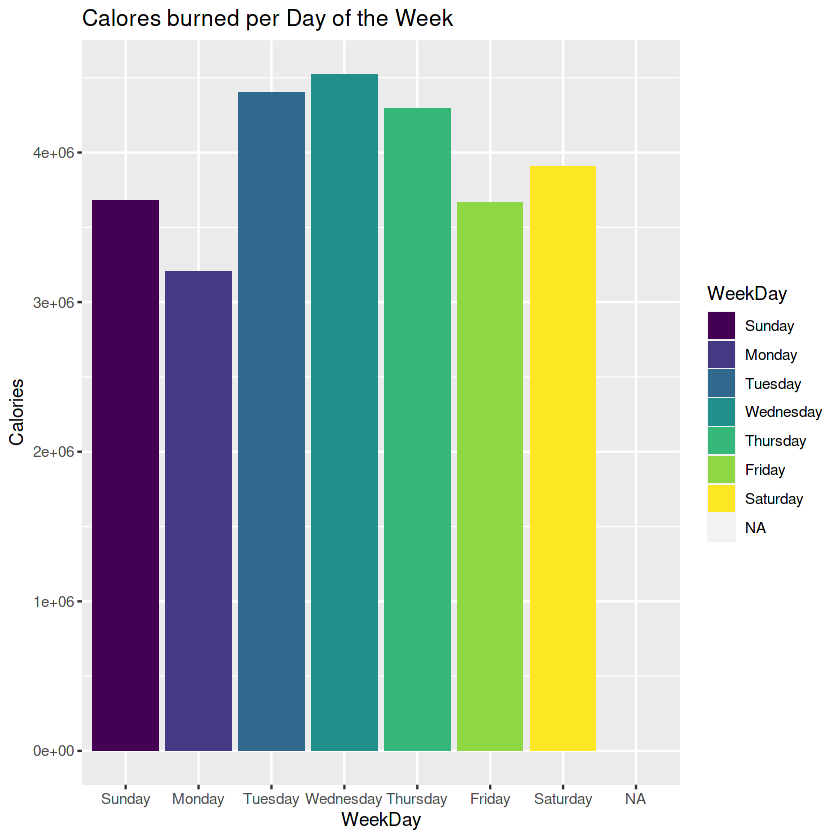

In [22]:
ggplot(data=combined_df,aes(x=WeekDay,y=Calories,fill=WeekDay))+geom_col()+labs(title="Calores burned per Day of the Week")

Looking at both 'Calories burned per Day of th Week' and 'TotalSleepRecords per Day of the Week' there does appear to be a relationship between sleep and calories recorded. 

Better data collection would be needed to investigate this relationship further. 

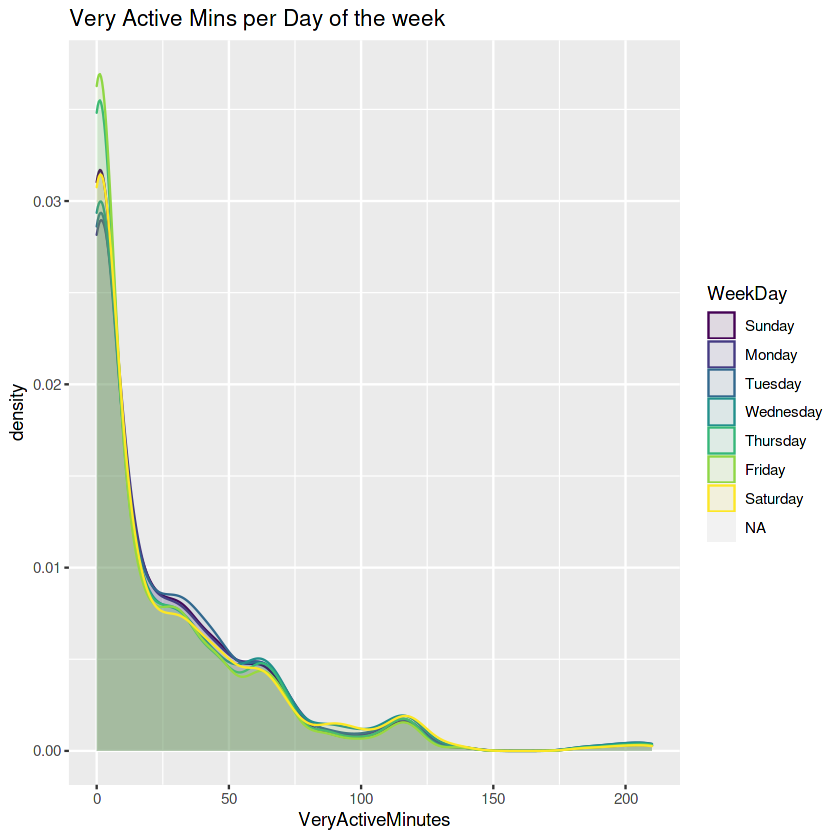

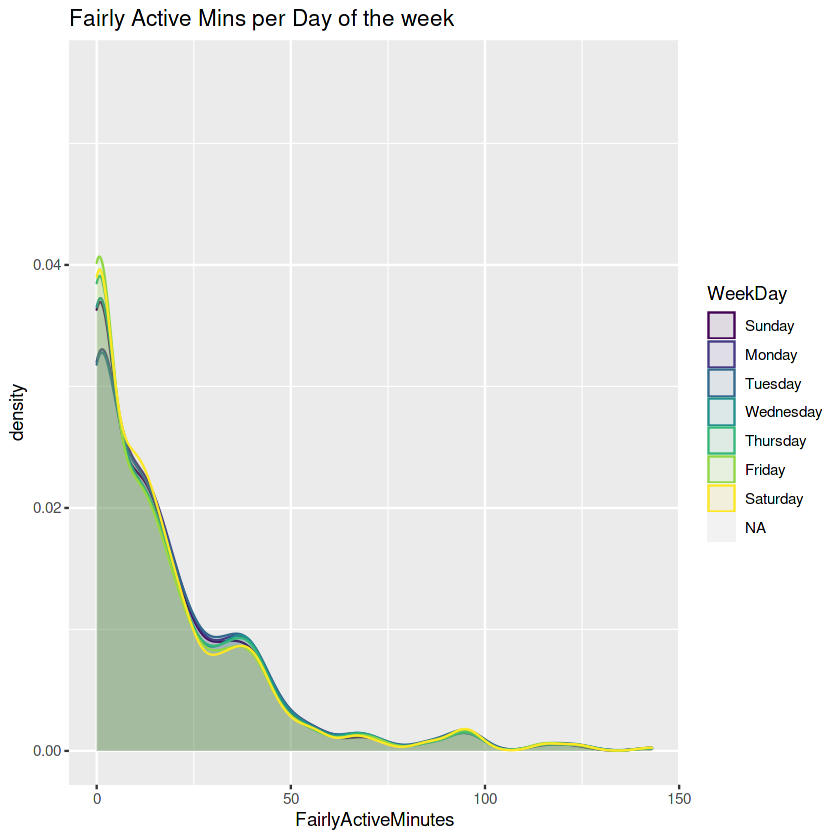

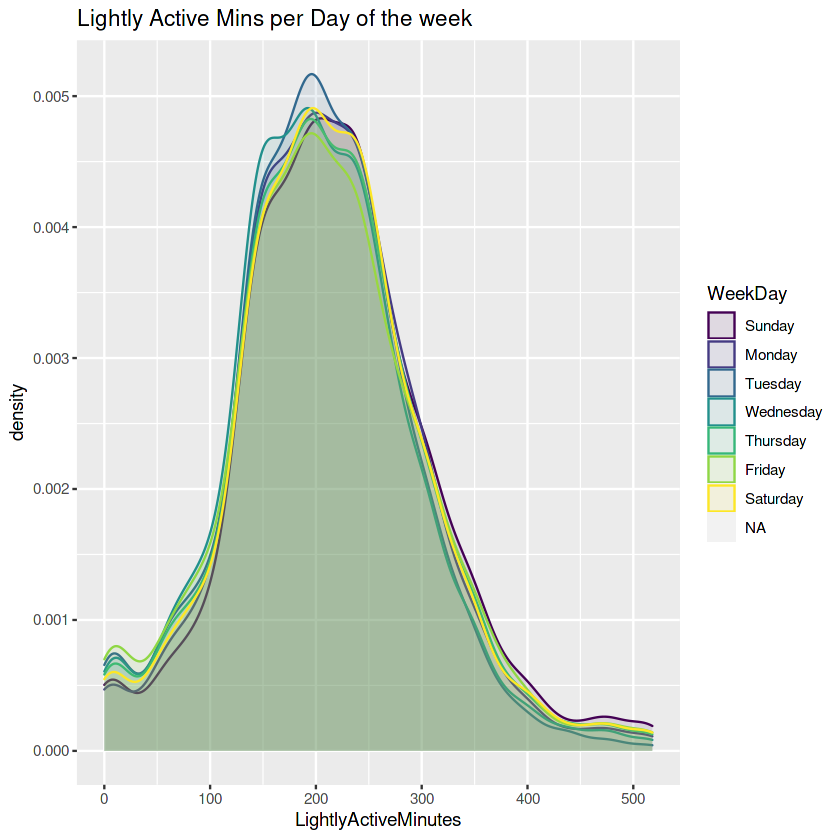

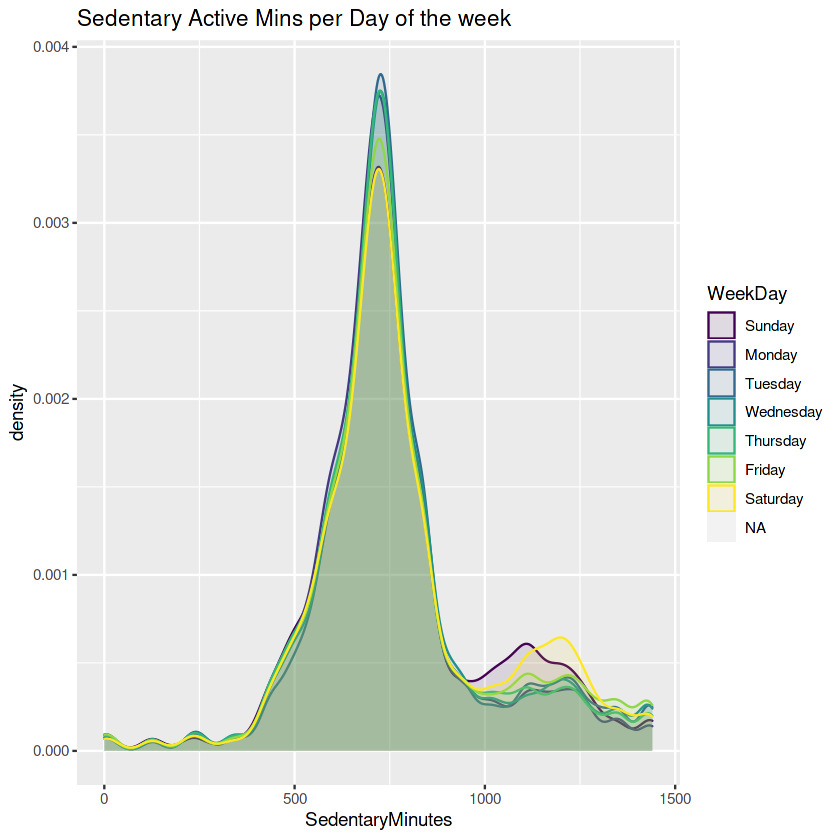

In [23]:
# # VeryActiveMinutes and Days of the week
ggplot(data=combined_df,aes(x=VeryActiveMinutes,fill=WeekDay,color=WeekDay))+geom_density(alpha=0.1)+labs(title="Very Active Mins per Day of the week")+theme_gray()
# # FairlyActiveMinutes and Days of the week
ggplot(data=combined_df,aes(x=FairlyActiveMinutes,fill=WeekDay,color=WeekDay))+geom_density(alpha=0.1)+labs(title="Fairly Active Mins per Day of the week")+theme_gray()
# # LightActiveMinutes and Days of the week 
ggplot(data=combined_df,aes(x=LightlyActiveMinutes,fill=WeekDay,color=WeekDay))+geom_density(alpha=0.1)+labs(title="Lightly Active Mins per Day of the week")+theme_gray()
# # SedentaryMins and Days of the week
ggplot(data=combined_df,aes(x=SedentaryMinutes,fill=WeekDay,color=WeekDay))+geom_density(alpha=0.1)+labs(title="Sedentary Active Mins per Day of the week")+theme_gray()


These density graphs follow the pie chart shown for the breakdown of time spent in activity. Additionally, they also highlight the consistency of the poplulation to spend time in each activity type over the course of a week, as there is only slight deviation per day across all four graphs.

# SHARE

## Trends Identified 
   - On average 80% of participant time was spend being sedentary.
   - On average 17% of time is spent in light activity; the second largest make-up.
   - There is a consistency of level of activity across the days of the week.
   - Total Steps and Total Distance both have a positive correlation with calories.
   - Participants are inconsitent when recording their data. A majority of participants did not record their WeightLogInfo. 

## Recommendations
   - Create goal setting reminders, to encourage consistent tracking of markers. Encourage the use of the app features to reach their goals, as targets could be met with consistent periods of higher intensity.
   - Find out if/how participants are tracking their weight; as well as if this is goal of the participants.  
   - Age and Gender: Collect data appropriate to the target audience for Bellabeat. Women around the world. Analysing such datasets allow for focused improvments of user habits and goald that are better applied to Bellabeat products. 
   - Develop visualizations for users to access represneting their use of key metrics. E.g., Calories, Total Steps, Sleeping pattern and Activity type. 
   